Fitting 5 folds for each of 18 candidates, totalling 90 fits
Najlepsze parametry: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}

📊 Wyniki najlepszego modelu:
MSE : 69713.77270371656
MAE : 169.06823809523812
R²  : 0.8210647913063721


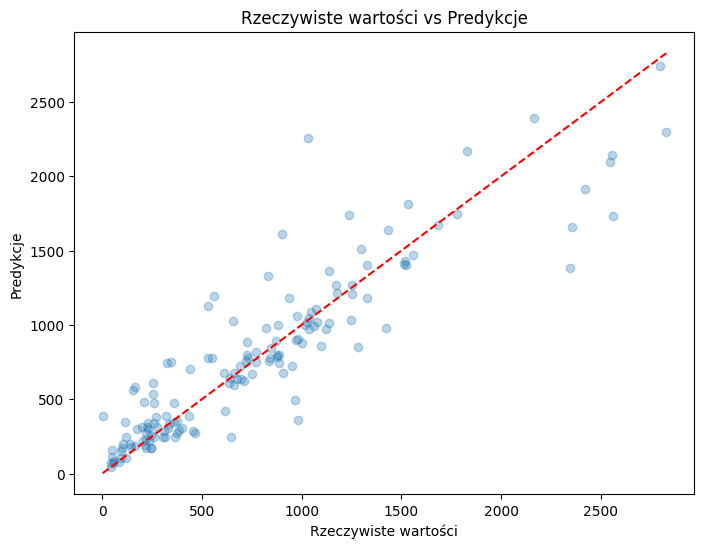

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Wczytaj dane
df = pd.read_csv(r"C:\Users\abero\Downloads\daily-bike-share.csv")

# 2. Definicja cech numerycznych i kategorycznych
num_features = ['temp', 'atemp', 'hum', 'windspeed']
cat_features = ['season', 'weekday', 'weathersit', 'mnth', 'yr', 'holiday', 'workingday']

# 3. Cechy i cel
X = df[num_features + cat_features]
y = df['rentals']

# 4. Podział na trening i test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# 6. Pipeline z preprocessingiem i modelem
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# 7. Siatka hiperparametrów
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

# 8. GridSearch
grid_search = GridSearchCV(
    pipeline_rf,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 9. Dopasowanie modelu
grid_search.fit(X_train, y_train)

print("Najlepsze parametry:", grid_search.best_params_)

# 10. Predykcje i ocena
y_pred = grid_search.predict(X_test)

print("\n📊 Wyniki najlepszego modelu:")
print("MSE :", mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R²  :", r2_score(y_test, y_pred))

# 11. Wykres: prawdziwe vs przewidywane
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Predykcje')
plt.title('Rzeczywiste wartości vs Predykcje')
plt.show()